### 将numpy记录转换为python字典列表

In [1]:
import numpy as np

In [2]:
recs = [('Bill', 31, 260.0), ('Fred', 15, 145.0)]
dt = np.dtype([('name', 'S30'),('age',int),('weight',float)]) 
r = np.array(recs, dtype=dt)
print r, r[0]['name']

[('Bill', 31, 260.0) ('Fred', 15, 145.0)] Bill


In [3]:
%timeit [{'name':rec[0], 'age': rec[1], 'weight': rec[2]} for rec in r]

The slowest run took 7.97 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 4.55 µs per loop


In [4]:
%timeit ({'name':rec[0], 'age': rec[1], 'weight': rec[2]} for rec in r)

The slowest run took 11.57 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 443 ns per loop


### python字典列表转numpy数组

#### 单个字典转数组

In [195]:
import numpy as np
result = {0: 1.11, 1: 0.55, 2: 0.47, 
          3: 0.48, 4: 1.0, 5: 0.13}
dt=[('id', 'f8'), ('data', 'f8')]

In [151]:
result.items()

[(0, 1.11), (1, 0.55), (2, 0.47), (3, 0.48), (4, 1.0), (5, 0.13)]

In [165]:
np.array(result.items(), dtype=dt)

array([(0.0, 1.11), (1.0, 0.55), (2.0, 0.47), (3.0, 0.48), (4.0, 1.0),
       (5.0, 0.13)], 
      dtype=[('id', '<f8'), ('data', '<f8')])

In [160]:
%timeit arr1 = np.array(result.items(), dtype=dt)

The slowest run took 9.71 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.34 µs per loop


In [163]:
%timeit arr2 = np.fromiter(result.iteritems(), dtype=dt)  # more memory-friendly 

The slowest run took 9.86 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.08 µs per loop


#### 字典列表转数组

In [212]:
dict_list = [{'age': 31, 'name': 'Bill', 'weight': 260.0}, 
             {'age': 15, 'name': 'Fred', 'weight': 145.0}]*10000
# [dict.values() for dict in dict_list]

In [219]:
dtype =[('age', 'i1'), ('name', 'S20'), ('weight', 'f4')]
# records = np.array([dict.values() for dict in dict_list], dtype=dtype) # 错误代码
# print records
# print records.shape

In [213]:
%timeit records = np.fromiter([tuple(dic.itervalues()) for dic in dict_list], dtype=dtype)

100 loops, best of 3: 15.9 ms per loop


In [214]:
%timeit records = np.fromiter((tuple(dic.values()) for dic in dict_list), dtype=dtype)

100 loops, best of 3: 10 ms per loop


In [215]:
%timeit records = np.fromiter(((dict['age'], dict['name'], dict['weight']) for dict in dict_list), dtype=dtype)

100 loops, best of 3: 6.18 ms per loop


In [216]:
%timeit records = np.fromiter([(dict['age'], dict['name'], dict['weight']) for dict in dict_list], dtype=dtype)

100 loops, best of 3: 5.99 ms per loop


#### 字典的值为元组字典转数组

In [73]:
import datetime
data_dict = {datetime.date(2006, 1, 1): (5, 3),
 datetime.date(2006, 1, 2): (8, 8),
 datetime.date(2006, 1, 3): (8, 5),
 datetime.date(2006, 1, 4): (3, 3),
 datetime.date(2006, 1, 5): (3, 3),
 datetime.date(2006, 1, 6): (4, 3)}

In [68]:
data_dict.items()

[(datetime.date(2006, 1, 6), (4, 3)),
 (datetime.date(2006, 1, 1), (5, 3)),
 (datetime.date(2006, 1, 2), (8, 8)),
 (datetime.date(2006, 1, 3), (8, 5)),
 (datetime.date(2006, 1, 4), (3, 3)),
 (datetime.date(2006, 1, 5), (3, 3))]

In [114]:
x = np.array(data_dict.items(), dtype=[('date', 'O4'), ('values', '(2,)f4')])
print x

[(datetime.date(2006, 1, 6), [4.0, 3.0])
 (datetime.date(2006, 1, 1), [5.0, 3.0])
 (datetime.date(2006, 1, 2), [8.0, 8.0])
 (datetime.date(2006, 1, 3), [8.0, 5.0])
 (datetime.date(2006, 1, 4), [3.0, 3.0])
 (datetime.date(2006, 1, 5), [3.0, 3.0])]


In [104]:
x['values'][:, 0]

array([ 4.,  5.,  8.,  8.,  3.,  3.], dtype=float32)

In [111]:
[(key,data_dict[key]) for key in data_dict]

[(datetime.date(2006, 1, 6), (4, 3)),
 (datetime.date(2006, 1, 1), (5, 3)),
 (datetime.date(2006, 1, 2), (8, 8)),
 (datetime.date(2006, 1, 3), (8, 5)),
 (datetime.date(2006, 1, 4), (3, 3)),
 (datetime.date(2006, 1, 5), (3, 3))]

In [223]:
y = np.fromiter(data_dict.iteritems(), dtype=[('date', 'O4'), ('values', '(2,)f4')]) # 不知道出错原因
print y

ValueError: cannot create object arrays from iterator

### subprocess模块

In [266]:
import subprocess
child = subprocess.Popen(["ping","-c","500","www.google.com"])
print "parent process"

parent process


In [271]:
import subprocess
child = subprocess.Popen(["ping","-c","1100000005","www.baidu.com"], shell=True)
child.wait()
print "parent process"

parent process


In [263]:
import subprocess
child1 = subprocess.Popen("dir", shell=True, stdout=subprocess.PIPE)
# child2 = subprocess.Popen(["wc"], stdin=child1.stdout,stdout=subprocess.PIPE)
out = child1.communicate()
print type(out[0])
print out[0].decode('utf-8', 'ignore')

<type 'str'>
  Z еľ caiguoxiong
 к 56B6-4304

 Z:\guoxiong\price_monitor-3.0 Ŀ¼

2015/09/16    03:27    <DIR>          .
2015/09/06    04:50    <DIR>          ..
2015/09/11    02:55         1,169,161 Hist-all-update.ipynb
2015/09/11    02:03             1,138 website_price_desc.txt
2015/09/11    03:04             5,388 README
2015/09/07 һ   02:56               846 website_cid.txt
2015/09/11    04:00               121 test.txt.py
2015/09/11    03:07             3,313 get_cid_spid_prices.py
2015/09/10    10:07               200 app.ini
2015/09/08 ܶ   01:53           469,051 Hist.ipynb-bak
2015/09/16    03:27           202,027 numpyһЩ.ipynb
2015/09/11    03:53                19 1,2.py
2015/09/11    10:01             1,695 website_price_desc_update.txt
2015/09/06    12:00               912 cid_sPid_mapper.py
2015/09/09    12:55             1,081 wsite_cid_spid_count.txt
2015/09/07 һ   08:31           102,525 website_cid_sPid.ipynb
2015/09/06    03:43         2,866,722 all_website_cid_sPid.

In [273]:
subprocess.check_output(["echo", "Hello World!"], shell=True)

'"Hello World!"\r\n'

In [ ]:
str.encode

In [274]:
def run_cmd_then_yield_stdout(cmd_str):
    import subprocess
    process = subprocess.Popen(cmd_str, shell=True, stdout=subprocess.PIPE)
    for line in process.stdout:
        yield line.strip()
    process.wait()
    if re

In [276]:
list(run_cmd_then_yield_stdout('dir'))

['\xc7\xfd\xb6\xaf\xc6\xf7 Z \xd6\xd0\xb5\xc4\xbe\xed\xca\xc7 caiguoxiong',
 '\xbe\xed\xb5\xc4\xd0\xf2\xc1\xd0\xba\xc5\xca\xc7 56B6-4304',
 '',
 'Z:\\guoxiong\\price_monitor-3.0 \xb5\xc4\xc4\xbf\xc2\xbc',
 '',
 '2015/09/16 \xd6\xdc\xc8\xfd  \xcf\xc2\xce\xe7 03:33    <DIR>          .',
 '2015/09/06 \xd6\xdc\xc8\xd5  \xcf\xc2\xce\xe7 04:50    <DIR>          ..',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 02:55         1,169,161 Hist-all-update.ipynb',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 02:03             1,138 website_price_desc.txt',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 03:04             5,388 README',
 '2015/09/07 \xd6\xdc\xd2\xbb  \xcf\xc2\xce\xe7 02:56               846 website_cid.txt',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 04:00               121 test.txt.py',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 03:07             3,313 get_cid_spid_prices.py',
 '2015/09/10 \xd6\xdc\xcb\xc4  \xc9\xcf\xce\xe7 10:07               200 app.ini',
 '2015/0

In [ ]:
def run_cmd_then_yield_stdout(cmd_str):
    import subprocess
    process = subprocess.Popen(cmd_str, shell=True, stdout=subprocess.PIPE)
    stdout_value = process.communicate()[0]
    for line in stdout_value:
        yield line.strip()

In [277]:
list(run_cmd_then_yield_stdout('dir'))

['\xc7\xfd\xb6\xaf\xc6\xf7 Z \xd6\xd0\xb5\xc4\xbe\xed\xca\xc7 caiguoxiong',
 '\xbe\xed\xb5\xc4\xd0\xf2\xc1\xd0\xba\xc5\xca\xc7 56B6-4304',
 '',
 'Z:\\guoxiong\\price_monitor-3.0 \xb5\xc4\xc4\xbf\xc2\xbc',
 '',
 '2015/09/16 \xd6\xdc\xc8\xfd  \xcf\xc2\xce\xe7 03:33    <DIR>          .',
 '2015/09/06 \xd6\xdc\xc8\xd5  \xcf\xc2\xce\xe7 04:50    <DIR>          ..',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 02:55         1,169,161 Hist-all-update.ipynb',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 02:03             1,138 website_price_desc.txt',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 03:04             5,388 README',
 '2015/09/07 \xd6\xdc\xd2\xbb  \xcf\xc2\xce\xe7 02:56               846 website_cid.txt',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 04:00               121 test.txt.py',
 '2015/09/11 \xd6\xdc\xce\xe5  \xcf\xc2\xce\xe7 03:07             3,313 get_cid_spid_prices.py',
 '2015/09/10 \xd6\xdc\xcb\xc4  \xc9\xcf\xce\xe7 10:07               200 app.ini',
 '2015/0

In [234]:
data = bytearray('\x01')
ndata = np.frombuffer(data, np.int8)

In [235]:
print ndata

[1]


In [239]:
ndata[0]=10

In [241]:
ndata

array([10], dtype=int8)

In [33]:
x=[i for i in range(10)]
import numpy as np
y = np.array(x)
median_price = np.median(y)
low_limit, upper_limit = 0.2*median_price, 5*median_price
print y
print  low_limit, upper_limit


[0 1 2 3 4 5 6 7 8 9]
0.9 22.5


In [9]:
import numpy as np 
z = np.array([1,2,3,4,5,6,5,7])

print (2 < z) 
# z[1<z<6]
print (5 > z)
print (2 < z) & (5 > z)

# print z[(2 < z) & (5 > z)]
# print z[(2 < z) * (5 > z)]

[False False  True  True  True  True  True  True]
[ True  True  True  True False False False False]
[False False  True  True False False False False]


In [35]:
d =[]
d.append(z)
print d

[array([1, 2, 3, 4, 5, 6, 5, 7])]


In [40]:
cid_prices = []
cid_prices.extend(z)
type(cid_prices),

list

In [41]:
np.median([1,2,3,4])

2.5

In [42]:
np.round([1,33.333,4.21], 1)


array([  1. ,  33.3,   4.2])

In [47]:
1000 < 'inf'

True

In [1]:
import numpy as np
x = 2
inf > 1

NameError: name 'inf' is not defined

In [2]:
%debug

> <ipython-input-1-1665a97ac9c6>(3)<module>()
      1 import numpy as np
      2 x = 2
----> 3 inf > 1

ipdb> x
2
ipdb> np.array([1,2,3])
array([1, 2, 3])
ipdb> 
array([1, 2, 3])
ipdb> exit


In [3]:
np.array([90])//100

array([0])

In [28]:
np.percentile([1,2,3,4],q=[0,25,50,75,100])

array([ 1.  ,  1.75,  2.5 ,  3.25,  4.  ])

In [35]:
print np.array([9900])//100

[99]


In [53]:
%%time
# for i in range(1000):
#     print i,
def test_fun(n):
    x = list()
    for i in xrange(n):
        x.append(i)


Wall time: 0 ns


In [51]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %

In [23]:
%quickref

In [22]:
%less get_cid_spid_prices.py

In [1]:
import numpy as np

In [3]:
a = np.array([1,2])
b = np.array([3,4])
np.concatenate((a,b))
a.concatenate(b)

AttributeError: 'numpy.ndarray' object has no attribute 'concatenate'

In [8]:
s = "abcdefgh"
np.fromstring(s, dtype='S')

ValueError: zero-valued itemsize

In [6]:
np.typeDict

{0: numpy.bool_,
 1: numpy.int8,
 2: numpy.uint8,
 3: numpy.int16,
 4: numpy.uint16,
 5: numpy.int32,
 6: numpy.uint32,
 7: numpy.int32,
 8: numpy.uint32,
 9: numpy.int64,
 10: numpy.uint64,
 11: numpy.float32,
 12: numpy.float64,
 13: numpy.float64,
 14: numpy.complex64,
 15: numpy.complex128,
 16: numpy.complex128,
 17: numpy.object_,
 18: numpy.string_,
 19: numpy.unicode_,
 20: numpy.void,
 21: numpy.datetime64,
 22: numpy.timedelta64,
 23: numpy.float16,
 '?': numpy.bool_,
 'B': numpy.uint8,
 'Bool': numpy.bool_,
 'Complex32': numpy.complex64,
 'Complex64': numpy.complex128,
 'D': numpy.complex128,
 'Datetime64': numpy.datetime64,
 'F': numpy.complex64,
 'Float16': numpy.float16,
 'Float32': numpy.float32,
 'Float64': numpy.float64,
 'G': numpy.complex128,
 'H': numpy.uint16,
 'I': numpy.uint32,
 'Int16': numpy.int16,
 'Int32': numpy.int32,
 'Int64': numpy.int64,
 'Int8': numpy.int8,
 'L': numpy.uint32,
 'M': numpy.datetime64,
 'M8': numpy.datetime64,
 'O': numpy.object_,
 'O8': n

In [26]:
a = np.arange(10)
a[[1,4]]

array([1, 4])

In [15]:
a[[1,3,5]]

array([1, 3, 5])

In [10]:
a = [1,4,5,3]
a[1]

4

In [29]:
float('inf') > 990.115

True

In [30]:
persontype = np.dtype({
    'names':['name', 'age', 'weight'],
    'formats':['S32','i', 'f']})
a = np.array([("Zhang",32,75.5),("Wang",24,65.2)],
    dtype=persontype)
print a

[('Zhang', 32, 75.5) ('Wang', 24, 65.19999694824219)]


In [37]:
persontype = np.dtype([('names','S32'), ('age', 'i4'), ('weight','f4')])
a = np.array([("Zhang",32,75.5),("Wang",24,65.2)],
              dtype=persontype)
print a[0].dtype, a[0]['names']
for each in a:
    print each

[('names', 'S32'), ('age', '<i4'), ('weight', '<f4')] Zhang
('Zhang', 32, 75.5)
('Wang', 24, 65.19999694824219)


In [56]:
mydtype = np.dtype([('name', 'S20'), ('score', 'f4', (2,))])

b = np.array([('cai',[1,2]), ('guo',[2,3])], dtype=mydtype)
print b
print b.dtype
print b[0]
print b[0]['score'].dtype

[('cai', [1.0, 2.0]) ('guo', [2.0, 3.0])]
[('name', 'S20'), ('score', '<f4', (2,))]
('cai', [1.0, 2.0])
float32


In [55]:
print b.strides, b.shape, b.size

(36L,) (2L,) 2


In [59]:
np.add.reduce([[1,2,3],[4,5,6]], axis=1) # 1,4 + 2,5 + 3,6

array([ 6, 15])

In [61]:
2**3

8

In [79]:
import scipy.optimize as opt 


def f(n, a, b, c):
    n = float(n)
    return [a**n-b**n-c]

result = opt.fsolve(f, x0=1, args=(7, 4, 2))
print result


[ 0.8536944]


In [81]:
x = np.float32(1.0)
x.dtype

dtype('float32')

In [88]:
y = np.int8(221.9)
print y, y.dtype

-35 int8


In [89]:
np.array([1, 2, 3], dtype='f')

array([ 1.,  2.,  3.], dtype=float32)

In [91]:
np.zeros((2, 3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [92]:
np.ones((2,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [94]:
np.linspace(1,4,6)

array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ])

In [96]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

In [99]:
from StringIO import StringIO

In [103]:
data = "1, 2 , 3\n4, 5, 6"
np.genfromtxt(StringIO(data), delimiter=',',dtype='i4')

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
data = "1, abc  , 2\n 3, xxx, 4"
np.genfromtxt(StringIO(data), dtype='i4,S3,i8', delimiter=',', names=('a,b,c'),autostrip=True, usecols=('a', 'c'))

array([(1, 2L), (3, 4L)], 
      dtype=[('a', '<i4'), ('c', '<i8')])

In [118]:
indices = (1,1,1,slice(0,2))

In [119]:
indices

(1, 1, 1, slice(0, 2, None))

In [120]:
(1,1,1,0:2)

SyntaxError: invalid syntax (<ipython-input-120-1a39573cbf36>, line 1)

[dtype](http://docs.scipy.org/doc/numpy/user/basics.rec.html)

In [127]:
# String argument 
x = np.zeros(3, dtype='3int8, float32, (2,3)float64')
x

array([([0, 0, 0], 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
       ([0, 0, 0], 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
       ([0, 0, 0], 0.0, [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])], 
      dtype=[('f0', 'i1', (3,)), ('f1', '<f4'), ('f2', '<f8', (2, 3))])

In [130]:
x = np.zeros(3, dtype=('i4',[('r','u1'), ('g','u1'), ('b','u1'), ('a','u1')]))
x

array([0, 0, 0])

In [129]:
# List argument
x = np.zeros(3, dtype=[('x','f4'),('y',np.float32),('value','f4',(2,2))])
x

array([(0.0, 0.0, [[0.0, 0.0], [0.0, 0.0]]),
       (0.0, 0.0, [[0.0, 0.0], [0.0, 0.0]]),
       (0.0, 0.0, [[0.0, 0.0], [0.0, 0.0]])], 
      dtype=[('x', '<f4'), ('y', '<f4'), ('value', '<f4', (2, 2))])

In [131]:
# Dictionary argument
x = np.zeros(3, dtype={'names': ['col1', 'col2'], 'formats': ['i4', 'f4']})
x

array([(0, 0.0), (0, 0.0), (0, 0.0)], 
      dtype=[('col1', '<i4'), ('col2', '<f4')])

In [132]:
x.dtype.names

('col1', 'col2')

In [135]:
x.dtype.names = ('x', 'y')
x

array([(0, 0.0), (0, 0.0), (0, 0.0)], 
      dtype=[('x', '<i4'), ('y', '<f4')])

#### Accessing and modifying field names

In [137]:
x = np.array([(1.5,2.5,(1.0,2.0)),(3.,4.,(4.,5.)),(1.,3.,(2.,6.))],
              dtype=[('x','f4'), ('y',np.float32), ('value','f4',(2,2))])
x

array([(1.5, 2.5, [[1.0, 2.0], [1.0, 2.0]]),
       (3.0, 4.0, [[4.0, 5.0], [4.0, 5.0]]),
       (1.0, 3.0, [[2.0, 6.0], [2.0, 6.0]])], 
      dtype=[('x', '<f4'), ('y', '<f4'), ('value', '<f4', (2, 2))])

In [138]:
x['x']

array([ 1.5,  3. ,  1. ], dtype=float32)

In [139]:
x[['x','value']]

array([(1.5, [[1.0, 2.0], [1.0, 2.0]]), (3.0, [[4.0, 5.0], [4.0, 5.0]]),
       (1.0, [[2.0, 6.0], [2.0, 6.0]])], 
      dtype=[('x', '<f4'), ('value', '<f4', (2, 2))])

In [2]:
arr = np.zeros((5,), dtype=[('var1','f8'),('var2','f8')])
arr['var1'] = np.arange(5)
arr

array([(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0)], 
      dtype=[('var1', '<f8'), ('var2', '<f8')])

In [142]:
arr[0] = (10, 20)

In [143]:
arr

array([(10.0, 20.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0)], 
      dtype=[('var1', '<f8'), ('var2', '<f8')])

In [1]:
import numpy as np

In [3]:
arr.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [4]:
arr.shape

(5L,)

In [5]:
arr.strides

(16L,)

In [6]:
arr.ndim

1

In [7]:
arr.size

5

In [8]:
arr.nbytes

80

In [9]:
arr.base

In [10]:
arr.ctypes

In [11]:
arr.T

array([(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0)], 
      dtype=[('var1', '<f8'), ('var2', '<f8')])

In [12]:
dt = np.dtype('i4')
dt.itemsize

4

In [13]:
dt.name

'int32'

In [15]:
np.dtype('S4').name

'string32'

In [16]:
np.dtype('S4').itemsize

4

In [19]:
np.dtype('f4').name

'float32'

In [20]:
np.typeDict

{0: numpy.bool_,
 1: numpy.int8,
 2: numpy.uint8,
 3: numpy.int16,
 4: numpy.uint16,
 5: numpy.int32,
 6: numpy.uint32,
 7: numpy.int32,
 8: numpy.uint32,
 9: numpy.int64,
 10: numpy.uint64,
 11: numpy.float32,
 12: numpy.float64,
 13: numpy.float64,
 14: numpy.complex64,
 15: numpy.complex128,
 16: numpy.complex128,
 17: numpy.object_,
 18: numpy.string_,
 19: numpy.unicode_,
 20: numpy.void,
 21: numpy.datetime64,
 22: numpy.timedelta64,
 23: numpy.float16,
 '?': numpy.bool_,
 'B': numpy.uint8,
 'Bool': numpy.bool_,
 'Complex32': numpy.complex64,
 'Complex64': numpy.complex128,
 'D': numpy.complex128,
 'Datetime64': numpy.datetime64,
 'F': numpy.complex64,
 'Float16': numpy.float16,
 'Float32': numpy.float32,
 'Float64': numpy.float64,
 'G': numpy.complex128,
 'H': numpy.uint16,
 'I': numpy.uint32,
 'Int16': numpy.int16,
 'Int32': numpy.int32,
 'Int64': numpy.int64,
 'Int8': numpy.int8,
 'L': numpy.uint32,
 'M': numpy.datetime64,
 'M8': numpy.datetime64,
 'O': numpy.object_,
 'O8': n

In [19]:
np.dtype('f4').name

'float32'

In [22]:
np.dtype(np.float64).itemsize

8

In [23]:
np.dtype(float)

dtype('float64')

In [24]:
np.dtype(int)

dtype('int32')

In [25]:
np.dtype(object)

dtype('O')

In [27]:
np.dtype(str).name

'string'

In [29]:
np.dtype('S').name

'string'

In [31]:
np.dtype('b')

dtype('int8')

In [32]:
np.dtype('i4')

dtype('int32')

In [33]:
np.dtype('S25')

dtype('S25')

In [34]:
np.dtype('a25')

dtype('S25')

In [35]:
np.dtype(('i4, (2,3)f8, f4', (2,3)))

dtype(([('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', '<f4')], (2, 3)))

In [37]:
a = np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [43]:
for x in np.nditer(a):
    print x,

0 1 2 3 4 5


In [44]:
for x in np.nditer(a.T):
    print x,

0 1 2 3 4 5


In [45]:
a.T

array([[0, 3],
       [1, 4],
       [2, 5]])

In [50]:
for x in np.nditer(a, op_flags=['readwrite']):
    x[...] = 2 * x

In [51]:
a

array([[ 0,  4,  8],
       [12, 16, 20]])

In [52]:
np.datetime64('2005-02-25')

numpy.datetime64('2005-02-25')

In [55]:
 np.datetime64('2005-02')

numpy.datetime64('2005-02')

In [56]:
 np.datetime64('2005-02', 'D')

numpy.datetime64('2005-02-01')

In [57]:
 np.datetime64('2005-02-25T03:30')

numpy.datetime64('2005-02-25T03:30+0800')

In [61]:
np.arange('2005-02', '2005-03', dtype='datetime64[D]')

array(['2005-02-01', '2005-02-02', '2005-02-03', '2005-02-04',
       '2005-02-05', '2005-02-06', '2005-02-07', '2005-02-08',
       '2005-02-09', '2005-02-10', '2005-02-11', '2005-02-12',
       '2005-02-13', '2005-02-14', '2005-02-15', '2005-02-16',
       '2005-02-17', '2005-02-18', '2005-02-19', '2005-02-20',
       '2005-02-21', '2005-02-22', '2005-02-23', '2005-02-24',
       '2005-02-25', '2005-02-26', '2005-02-27', '2005-02-28'], dtype='datetime64[D]')

In [62]:
 np.datetime64('2009-01-01') - np.datetime64('2008-01-01')

numpy.timedelta64(366,'D')

In [72]:
a = np.datetime64('2011-06-15T00:00') - np.timedelta64(30, 'D')
a

numpy.datetime64('2011-05-16T00:00+0800')

In [71]:
b = np.datetime64('2011-06-15T00:00')
b

numpy.datetime64('2011-06-15T00:00+0800')

In [75]:
np.arange(b, a, dtype='datetime64[D]')

TypeError: Cannot cast NumPy timedelta64 scalar from metadata [m] to [D] according to the rule 'same_kind'

### pareto分布

In [76]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [162]:
from scipy import stats
import matplotlib.pyplot as plt

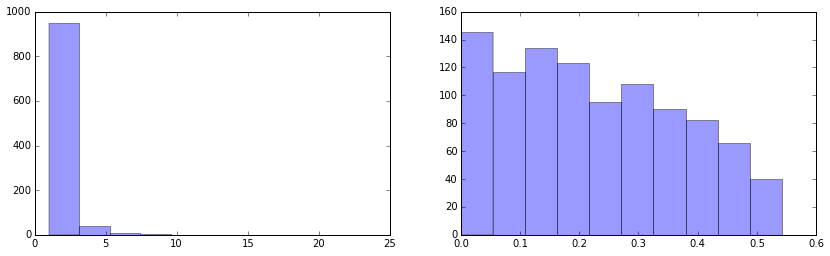

In [393]:
fig = plt.figure(figsize=(14,4))
x = stats.pareto.rvs(2.6, size=1000)
xt, xt_lambda = stats.boxcox(x)

ax1 = fig.add_subplot(121)
ax1.hist(x, alpha=0.4)

ax2 = fig.add_subplot(122)
ax2.hist(xt, alpha=0.4)

plt.show()

In [140]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

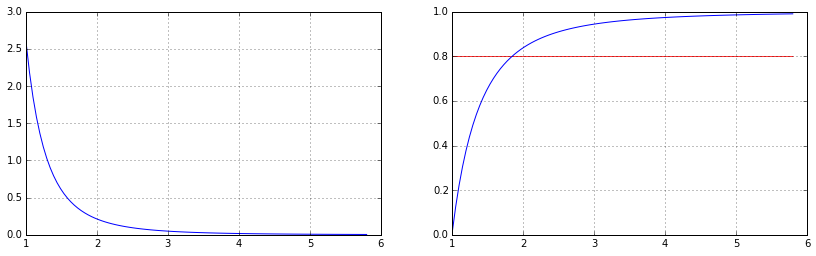

In [320]:
b = 2.62
x = np.linspace(pareto.ppf(0.01, b),
                pareto.ppf(0.99, b), 100)
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax1.plot(x, pareto.pdf(x,b)) #密度函数
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(x, pareto.cdf(x,b))#累计概率分布
ax2.hlines(0.8, np.min(x), np.max(x), colors='r', alpha=0.8)
ax2.grid(True)

plt.show()

In [148]:
vals = pareto.ppf([0.001, 0.5, 0.999], b)
np.allclose([0.001, 0.5, 0.999], pareto.cdf(vals, b))

True

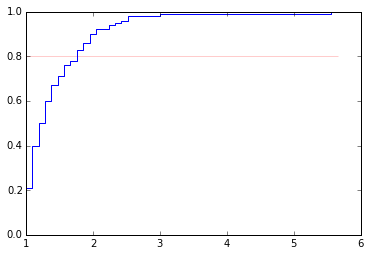

In [323]:
import numpy as np
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt

sample = stats.pareto.rvs(2.6, size=100)
ecdf = sm.distributions.ECDF(sample, side='right')

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.hlines(0.8, np.min(x),np.max(x), colors='r', alpha=0.2)
plt.show()

In [263]:
ecdf([3, 55, 0.5, 1.5])

array([ 1.  ,  1.  ,  0.54,  1.  ])

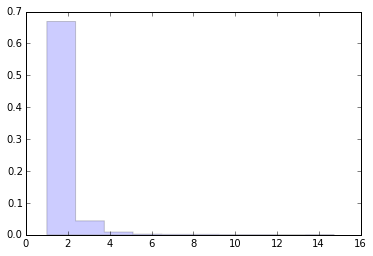

In [150]:
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

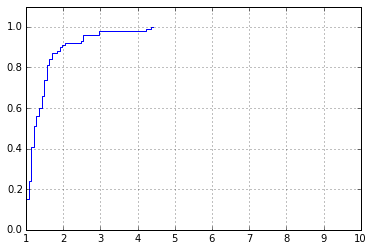

In [429]:
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

data = stats.pareto.rvs(2.6, size=100)
ecdf = ECDF(data)

xmin=np.min(data)
xmax = np.max(data)
x = np.linspace(xmin, xmax)
y = ecdf(x)
# ecdf([3, 3, 1, 4])
plt.step(x, y)
plt.xlim(1,10)
plt.ylim(0,1.1)
# plt.hlines(0.8, 1,10, colors='r',linestyles='solid',alpha=0.5)
plt.grid(True)
plt.show()

### CDF

[CDF](http://stackoverflow.com/questions/24575869/read-file-and-plot-cdf-in-python)

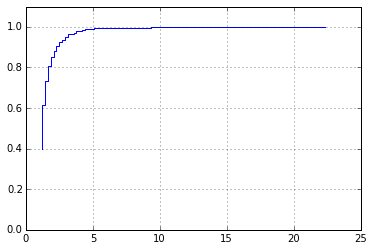

In [437]:
import numpy as np
import matplotlib.pyplot as plt

data = stats.pareto.rvs(2.6, size=1000)
num_bins = 100

# Use the histogram function to bin the data
counts, bin_edges = np.histogram(data, bins=num_bins)

cdf = 1.0*np.cumsum(counts)/np.sum(counts)
plt.step(bin_edges[1:], cdf)
# plt.xlim(1, 6)
plt.grid(True)
plt.ylim(0,1.1)
plt.show()


[box-cox变换](http://docs.scipy.org/doc/scipy-dev/reference/generated/scipy.stats.boxcox.html)

In [227]:
fig = plt.figure(figsize=(14,8))
x = stats.pareto.rvs(2.6, size=100)  # 生成随机数
print x

[ 1.9101651   1.03738145  1.54448901  1.2889196   2.23448423  2.70834508
  1.14139601  1.22615856  1.43204057  1.63422734  1.48170851  6.22635528
  1.28656154  1.00784714  1.52247985  1.12070482  1.71284598  1.32640883
  1.21970762  1.04821103  1.38500532  1.10286239  1.00125341  1.26050578
  1.51000684  1.70264406  1.99142343  1.1190074   1.15489805  1.03369503
  1.60389586  1.24042696  2.67454178  1.32396919  2.79653262  1.79378638
  1.21061402  2.30536043  1.08526085  1.7640386   1.09369006  1.1340843
  1.28062468  1.24217693  1.73504142  1.05747959  1.01215743  1.17032753
  2.20201786  2.05603946  1.01474157  2.49100733  1.18098872  1.13126
  1.60681151  1.21013159  1.13906407  1.12834727  2.26158607  1.02310813
  1.72319723  1.37533226  1.92552707  3.06298874  1.20391325  1.22289098
  1.28112762  1.81570129  1.05412972  2.8018418   1.39698358  1.64617159
  1.07382424  1.42616278  2.26185787  1.98276058  1.17398817  1.66091288
  1.04382223  1.35857531  2.66082024  1.20031969  3.457

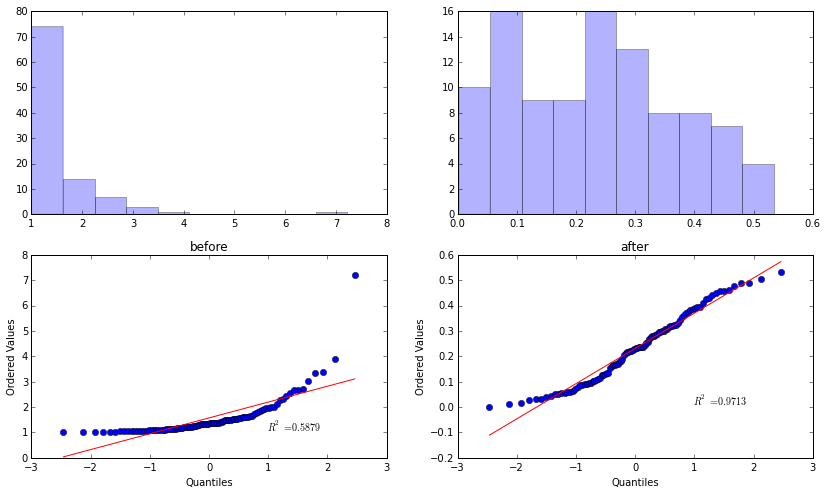

In [203]:
xt, xt_lambda = stats.boxcox(x)  # box-cox变换

ax1 = fig.add_subplot(221)
ax1.hist(x, alpha=0.3)
# ax1.grid(axis='y')

ax2 = fig.add_subplot(222)
ax2.hist(xt, alpha=0.3)
# ax2.grid(axis='y')

ax3 = fig.add_subplot(223)
prob = stats.probplot(x, dist=stats.norm, plot=ax3)
ax3.set_title('before')

ax4 = fig.add_subplot(224)

prob = stats.probplot(xt, dist=stats.norm, plot=ax4)
ax4.set_title('after')

plt.show()

In [205]:
vals = pareto.ppf([0.001, 0.5, 0.999], b)
print vals

[  1.00038194   1.30285758  13.96491086]


In [ ]:
dtype

In [440]:
x = np.linspace(-2.5, 2.5, 6)
np.piecewise(x, [x<-1, (x>=-1) & (x<0), x>=0],[-1,0,1])

array([-1., -1.,  0.,  1.,  1.,  1.])

In [441]:
np.info('dtype')

     *** Found in numpy ***
 dtype()

dtype(obj, align=False, copy=False)

Create a data type object.

A numpy array is homogeneous, and contains elements described by a
dtype object. A dtype object can be constructed from different
combinations of fundamental numeric types.

Parameters
----------
obj
    Object to be converted to a data type object.
align : bool, optional
    Add padding to the fields to match what a C compiler would output
    for a similar C-struct. Can be ``True`` only if `obj` is a dictionary
    or a comma-separated string. If a struct dtype is being created,
    this also sets a sticky alignment flag ``isalignedstruct``.
copy : bool, optional
    Make a new copy of the data-type object. If ``False``, the result
    may just be a reference to a built-in data-type object.

See also
--------
result_type

Examples
--------
Using array-scalar type:

>>> np.dtype(np.int16)
dtype('int16')

Record, one field name 'f1', containing int16:

>>> np.dtype([('f1', np.int16)])

In [443]:
np.c_[np.array([[1,2,3]]), 0, 0]

array([[1, 2, 3, 0, 0]])

In [442]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [444]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

In [446]:
x = np.arange(9.).reshape(3, 3)
np.where(x<5, x, 999)
print x

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]


In [447]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 1, 2, 3, 4, 1])
z = np.polyfit(x, y, 3)
z

array([-0.18518519,  1.03174603, -0.32275132,  0.12698413])

In [452]:
y = ((i,i) for i in range(10))

In [454]:
np.union1d(item for item in y)

TypeError: union1d() takes exactly 2 arguments (1 given)

In [457]:
import pandas as pd
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]}); df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [458]:
 df.ix[df.AAA >= 5,'BBB'] = -1; df

,AAA,BBB,CCC
0,4,10,100
1,5,-1,50
2,6,-1,-30
3,7,-1,-50


In [459]:
pd.read_msgpa

ImportError: No module named Monary

In [5]:
zip(*[(1,2,3), (4,5,6)])

[(1, 4), (2, 5), (3, 6)]

In [282]:
from itertools import count, izip
for i in izip(count(1), xrange(1000)):
    print i

(1, 0)
(2, 1)
(3, 2)
(4, 3)
(5, 4)
(6, 5)
(7, 6)
(8, 7)
(9, 8)
(10, 9)
(11, 10)
(12, 11)
(13, 12)
(14, 13)
(15, 14)
(16, 15)
(17, 16)
(18, 17)
(19, 18)
(20, 19)
(21, 20)
(22, 21)
(23, 22)
(24, 23)
(25, 24)
(26, 25)
(27, 26)
(28, 27)
(29, 28)
(30, 29)
(31, 30)
(32, 31)
(33, 32)
(34, 33)
(35, 34)
(36, 35)
(37, 36)
(38, 37)
(39, 38)
(40, 39)
(41, 40)
(42, 41)
(43, 42)
(44, 43)
(45, 44)
(46, 45)
(47, 46)
(48, 47)
(49, 48)
(50, 49)
(51, 50)
(52, 51)
(53, 52)
(54, 53)
(55, 54)
(56, 55)
(57, 56)
(58, 57)
(59, 58)
(60, 59)
(61, 60)
(62, 61)
(63, 62)
(64, 63)
(65, 64)
(66, 65)
(67, 66)
(68, 67)
(69, 68)
(70, 69)
(71, 70)
(72, 71)
(73, 72)
(74, 73)
(75, 74)
(76, 75)
(77, 76)
(78, 77)
(79, 78)
(80, 79)
(81, 80)
(82, 81)
(83, 82)
(84, 83)
(85, 84)
(86, 85)
(87, 86)
(88, 87)
(89, 88)
(90, 89)
(91, 90)
(92, 91)
(93, 92)
(94, 93)
(95, 94)
(96, 95)
(97, 96)
(98, 97)
(99, 98)
(100, 99)
(101, 100)
(102, 101)
(103, 102)
(104, 103)
(105, 104)
(106, 105)
(107, 106)
(108, 107)
(109, 108)
(110, 109)
(111, 11

In [315]:

 
i = 1
print 'before: i =', i
 
print 'comprehension: ', [i for i in range(5)]
 
print 'after: i =', i

 before: i = 1
comprehension:  [0, 1, 2, 3, 4]
after: i = 4


In [318]:
[{'a': 1}, {'b': 2}, {'c': 2}, {'d': 2}, {'e': 2}]*10

[{'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2},
 {'a': 1},
 {'b': 2},
 {'c': 2},
 {'d': 2},
 {'e': 2}]

In [9]:
from itertools import count
a = count(1)
for i in xrange(100):
    b = next(a)
    if b % 10 == 0:
        print b,

10 20 30 40 50 60 70 80 90 100


In [ ]:
y = [{1:2,3:4},{'a':1, 'b':2}]*10

In [15]:
y[0] = {1:3,2:4}

In [ ]:
a = [10, 8, 7,9]
b = [2, 3, 4, 1]

In [ ]:
np.average(a, weights=b)